In [1]:
%matplotlib inline
from jewelry import JewelryGenetic, JewelryPSO, solve_jewelry
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tests import test_algorithm

sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 2.5})
sns.set(style='white', palette='Set2')

In [2]:
max_weight = 10
items = [(2, 2), (3, 3), (5, 5), (6, 4)]
         
genetic_alg = JewelryGenetic(max_weight, items)
# valori mici se comporta mai bine
pso_alg = JewelryPSO(max_weight, items, inertia=0.1, cognitive_coef=2, swarm_coef=2, nbpso=False)
nbpso_alg = JewelryPSO(max_weight, items, inertia=0.1, cognitive_coef=2, swarm_coef=2, nbpso=True)

In [3]:
# compute stats
pso_best_mean_fitnesses = []
pso_mean_fitnesses = []
genetic_mean_fitnesses = []
nbpso_best_mean_fitnesses = []
nbpso_mean_fitnesses = []

for result in nbpso_alg.run_swarm(100):
    nbpso_best_mean_fitnesses.append(np.array([ind.best_fitness for ind in result]).mean())
    nbpso_mean_fitnesses.append(np.array([ind.fitness for ind in result]).mean())
    
for result in pso_alg.run_swarm(100):
    pso_best_mean_fitnesses.append(np.array([ind.best_fitness for ind in result]).mean())
    pso_mean_fitnesses.append(np.array([ind.fitness for ind in result]).mean())
    
for result in genetic_alg.run(100):
    genetic_mean_fitnesses.append(np.array([x[0] for x in result]).mean())

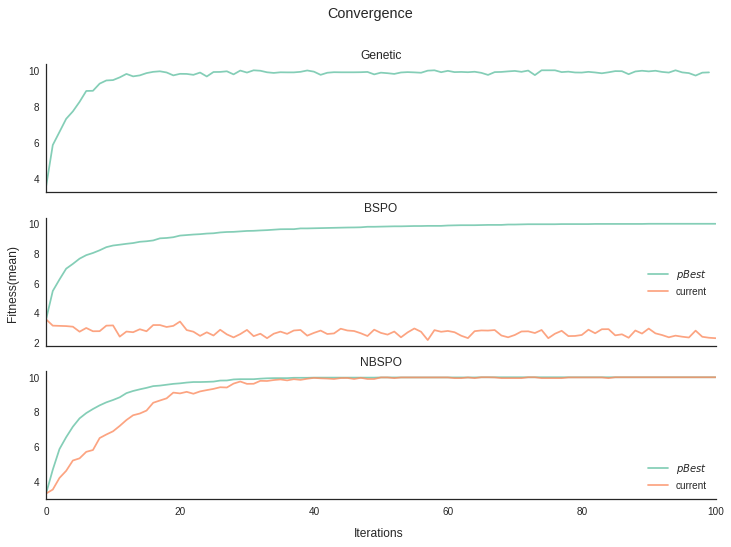

In [4]:
f, axarr = plt.subplots(3, sharex=True, figsize=(12, 8))

axarr[0].plot(genetic_mean_fitnesses, alpha=0.8)
axarr[0].set_title('Genetic')

axarr[1].plot(pso_best_mean_fitnesses, label='$pBest$', alpha=0.8)
axarr[1].plot(pso_mean_fitnesses, label='current', alpha=0.8)
axarr[1].set_title('BSPO')
axarr[1].legend()

axarr[2].plot(nbpso_best_mean_fitnesses, label='$pBest$', alpha=0.8)
axarr[2].plot(nbpso_mean_fitnesses, label='current', alpha=0.8)
axarr[2].set_title('NBSPO')
axarr[2].legend()


f.text(0.08, 0.5, 'Fitness(mean)', va='center', rotation='vertical')
f.text(0.51, 0.06, 'Iterations', ha='center')
f.suptitle('Convergence')

plt.xlim(xmin=0, xmax=100)

sns.despine()

In [5]:
max_weight = 10
items = [(2, 2), (3, 3), (5, 6), (6, 4)]
print solve_jewelry(max_weight, items, algorithm='pso')
print solve_jewelry(max_weight, items, algorithm='genetic')

(11, array([ True,  True,  True, False], dtype=bool))
(11, array([ True,  True,  True, False], dtype=bool))


In [6]:
test_algorithm('pso')
test_algorithm('genetic')
print 'tests PASSED'

tests PASSED
